In [6]:
from foodb_helper import prepare_dataset, read_food_data

original_food_df = read_food_data()
original_food_df

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
0,1,Angelica,Angelica keiskei,Angelica is a genus of about 60 species of tal...,NaN,Angelica,1.jpg,image/jpeg,111325.0,2012-04-20 09:29:57 UTC,...,Type 1,2011-02-09 00:37:14 UTC,2019-05-14 18:04:13 UTC,NaN,2.0,False,specific,357850.0,True,FOOD00001
1,2,Savoy cabbage,Brassica oleracea var. sabauda,Savoy cabbage (Brassica oleracea convar. capit...,NaN,Savoy cabbage,2.jpg,image/jpeg,155178.0,2012-04-20 09:39:54 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,1216010.0,True,FOOD00002
2,3,Silver linden,Tilia argentea,Tilia tomentosa (Silver Lime in the UK and Sil...,845789.0,Tilia tomentosa,3.jpg,image/jpeg,56367.0,2012-04-20 09:41:25 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-17 16:19:45 UTC,NaN,NaN,False,specific,NaN,True,FOOD00003
3,4,Kiwi,Actinidia chinensis,"The kiwifruit, often shortened to kiwi in many...",506775.0,Kiwifruit,4.jpg,image/jpeg,110661.0,2012-04-20 09:32:21 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,3625.0,True,FOOD00004
4,5,Allium,Allium,Allium haematochiton is a species of wild onio...,42634.0,Allium haematochiton,5.jpg,image/jpeg,341911.0,2012-04-20 09:37:44 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,4678.0,True,FOOD00005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1020,Cape gooseberry,Physalis peruviana,"Physalis peruviana, a plant species of the gen...",NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-01-24 17:05:37 UTC,2020-01-24 17:05:37 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00988
988,1021,Herbal tea,NaN,Herbal teas are the beverages made from the in...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-03-12 20:55:17 UTC,2020-03-12 20:55:17 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00989
989,1022,Fish oil,NaN,Fish oil is oil derived from the tissues of oi...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-03-12 21:00:02 UTC,2020-03-12 21:00:02 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00990
990,1023,Taco shell,NaN,The hard-shell or crispy taco is a tradition t...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 2,2020-03-12 21:01:58 UTC,2020-03-12 21:01:58 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00991


In [7]:
food_df = original_food_df
food_df, x, y = prepare_dataset(food_df)
food_df

,name,description,food_type,category
0,Angelica,Angelica is a genus of about 60 species of tal...,Type 1,specific
1,Savoy cabbage,Savoy cabbage (Brassica oleracea convar. capit...,Type 1,specific
2,Silver linden,Tilia tomentosa (Silver Lime in the UK and Sil...,Type 1,specific
3,Kiwi,"The kiwifruit, often shortened to kiwi in many...",Type 1,specific
4,Allium,Allium haematochiton is a species of wild onio...,Type 1,specific
...,...,...,...,...
987,Cape gooseberry,"Physalis peruviana, a plant species of the gen...",Type 1,unknown
988,Herbal tea,Herbal teas are the beverages made from the in...,Type 1,unknown
989,Fish oil,Fish oil is oil derived from the tissues of oi...,Type 1,unknown
990,Taco shell,The hard-shell or crispy taco is a tradition t...,Type 2,unknown


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, losses

print(tf.__version__)

2.16.2


In [9]:
x

,name,description,category
0,Angelica,Angelica is a genus of about 60 species of tal...,specific
1,Savoy cabbage,Savoy cabbage (Brassica oleracea convar. capit...,specific
2,Silver linden,Tilia tomentosa (Silver Lime in the UK and Sil...,specific
3,Kiwi,"The kiwifruit, often shortened to kiwi in many...",specific
4,Allium,Allium haematochiton is a species of wild onio...,specific
...,...,...,...
987,Cape gooseberry,"Physalis peruviana, a plant species of the gen...",unknown
988,Herbal tea,Herbal teas are the beverages made from the in...,unknown
989,Fish oil,Fish oil is oil derived from the tissues of oi...,unknown
990,Taco shell,The hard-shell or crispy taco is a tradition t...,unknown


In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

categories = list(x["category"].unique())
category_mapping = {category: idx for idx, category in enumerate(categories)}
x["category"] = x["category"].map(category_mapping)
num_categories = len(categories)


def one_hot_encode_category(category):
    return tf.one_hot(category, depth=num_categories)


food_types = list(y["food_type"].unique())
types = {food_type: idx for idx, food_type in enumerate(food_types)}


def encode_type(food_type: str):
    return types[food_type]


y = y.map(encode_type)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

max_features = 6
sequence_length = 3

name_vectorize_layer = layers.TextVectorization(
    max_tokens=max_features, output_mode="int", output_sequence_length=sequence_length
)

description_vectorize_layer = layers.TextVectorization(
    max_tokens=max_features, output_mode="int", output_sequence_length=sequence_length
)

label_vectorize_layer = layers.TextVectorization(max_tokens=max_features, output_mode="int", output_sequence_length=3)

name_vectorize_layer.adapt(x_train["name"])
description_vectorize_layer.adapt(x_train["description"])

print(x_train.dtypes)
print(y_train.dtypes)
train_ds = tf.data.Dataset.from_tensor_slices((x_train["name"], x_train["description"], x_train["category"], y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test["name"], x_test["description"], x_test["category"], y_test))


def preprocess_inputs(name, description, category, label):
    name = name_vectorize_layer(name)
    description = description_vectorize_layer(description)
    category = one_hot_encode_category(category)
    label = to_categorical(label, num_classes=3)
    label = tf.reshape(label, shape=(3,))
    return {"name": name, "description": description, "category": category}, label


batch_size = 32
train_ds = train_ds.map(preprocess_inputs).batch(batch_size)
test_ds = test_ds.map(preprocess_inputs).batch(batch_size)

# print(train_ds, test_ds)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

embedding_dim = 16

name_input_layer = layers.Input(shape=(sequence_length,), name="name")
category_input_layer = layers.Input(shape=(num_categories,), name="category")

name_embedding_layer = layers.Embedding(max_features, embedding_dim)(name_input_layer)
name_output_layer = layers.GlobalAveragePooling1D()(name_embedding_layer)

description_input_layer = layers.Input(shape=(sequence_length,), name="description")
description_embedding_layer = layers.Embedding(max_features, embedding_dim)(description_input_layer)
description_output_layer = layers.GlobalAveragePooling1D()(description_embedding_layer)

category_output_layer = layers.Dense(embedding_dim)(category_input_layer)

combined_layer = layers.concatenate([name_output_layer, description_output_layer, category_output_layer])

layer = layers.Dropout(0.2)(combined_layer)
layer = layers.Dense(16, activation="relu")(layer)
output_layer = layers.Dense(3, activation="softmax")(layer)

model = tf.keras.Model(inputs=[name_input_layer, description_input_layer, category_input_layer], outputs=output_layer)

print(model.summary())

model.compile(loss=losses.CategoricalCrossentropy(), optimizer="adam", metrics=[tf.metrics.CategoricalAccuracy()])

epochs = 10
history = model.fit(train_ds, validation_data=test_ds, epochs=epochs)

loss, accuracy = model.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

name           object
description    object
category        int64
dtype: object
food_type    int64
dtype: object


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ name (InputLayer)   │ (None, 3)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ description         │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 3, 16)     │         96 │ name[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 3, 16)     │         96 │ description[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ category            │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 16)        │          0 │ embedding[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 16)        │          0 │ embedding_1[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 16)        │         64 │ category[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 48)        │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_average_p… │
│                     │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48)        │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 16)        │        784 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 3)         │         51 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,091 (4.26 KB)

 Trainable params: 1,091 (4.26 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.6165 - loss: 1.0082 - val_categorical_accuracy: 0.6895 - val_loss: 0.8126
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.7438 - loss: 0.7454 - val_categorical_accuracy: 0.6895 - val_loss: 0.7134
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.7438 - loss: 0.6401 - val_categorical_accuracy: 0.6895 - val_loss: 0.6820
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.7438 - loss: 0.6124 - val_categorical_accuracy: 0.6895 - val_loss: 0.6645
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.7438 - loss: 0.5888 - val_categorical_accuracy: 0.6895 - val_loss: 0.6472
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.7438 - loss: 0.5693 - val_categorical_accuracy: 0.6895 - val_loss: 0.6254
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.7438 - loss: 0.557

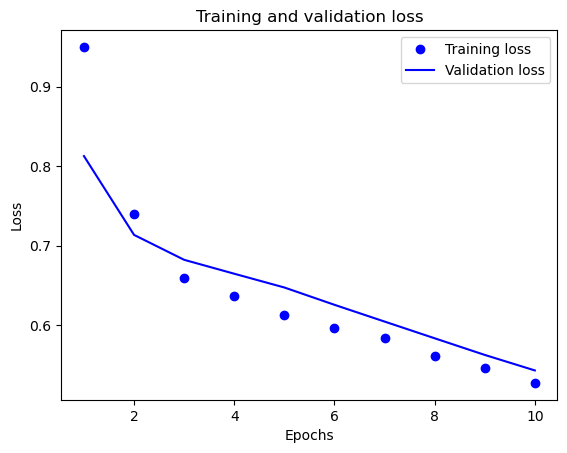

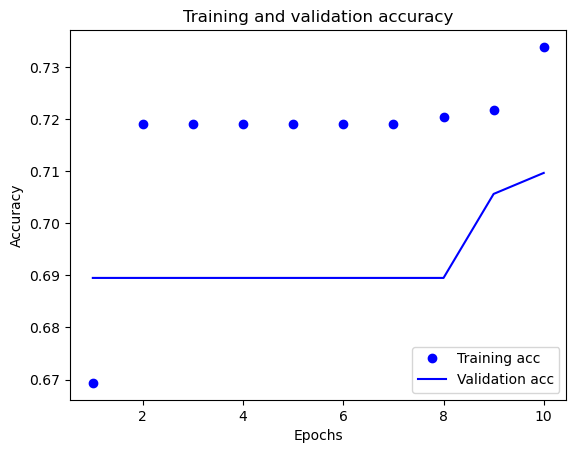

In [11]:
from matplotlib import pyplot as plt

history_dict = history.history
# history_dict.keys()

acc = history_dict["categorical_accuracy"]
val_acc = history_dict["val_categorical_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

plt.show()

In [12]:
import numpy as np


def make_prediction(input_data):
    predictions = model.predict(input_data)
    print("Predictions:", predictions)
    predicted_classes = [food_types[np.argmax(pred)] for pred in predictions]
    print("Human-readable predictions:", predicted_classes)


category_tensor = one_hot_encode_category(category_mapping["specific"])

food_name = "Herbal tea"
input_data = {
    "name": tf.expand_dims(name_vectorize_layer(food_name), axis=0),
    "description": tf.expand_dims(description_vectorize_layer("is not specified"), axis=0),
    "category": tf.expand_dims(category_tensor, axis=0),
}
make_prediction(input_data)

input_data = {
    **input_data,
    "name": tf.expand_dims(name_vectorize_layer("Fish oil"), axis=0),
}
make_prediction(input_data)

input_data = {
    **input_data,
    "name": tf.expand_dims(name_vectorize_layer("Taco shell"), axis=0),
}
make_prediction(input_data)

input_data = {
    **input_data,
    "name": tf.expand_dims(name_vectorize_layer("Tostada shell"), axis=0),
}
make_prediction(input_data)

original_food_df.query("name == ['Herbal tea', 'Fish oil', 'Taco shell', 'Tostada shell']")[["name", "food_type"]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predictions: [[0.6003338  0.38747358 0.01219267]]
Human-readable predictions: ['Type 1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predictions: [[0.5021294  0.47926575 0.01860489]]
Human-readable predictions: ['Type 1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predictions: [[0.6003338  0.38747358 0.01219267]]
Human-readable predictions: ['Type 1']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predictions: [[0.6003338  0.38747358 0.01219267]]
Human-readable predictions: ['Type 1']


,name,food_type
988,Herbal tea,Type 1
989,Fish oil,Type 1
990,Taco shell,Type 2
991,Tostada shell,Type 2


In [13]:
original_food_df.query(f"name == '{food_name}'")

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
988,1021,Herbal tea,NaN,Herbal teas are the beverages made from the in...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-03-12 20:55:17 UTC,2020-03-12 20:55:17 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00989


In [14]:
model.save("models/foodb-tf-3feat.keras")